# Versuch 6: Magnetfelder - Robin Hoffmann
##Aufgabe 1: Stärke und Inklinationswinkel des Erdmagnetfeldes

Ermittelte Daten durch Messung:

$B_x = (-0,5±0,3) µT$

$B_y = (32,2±0,3) µT$

$B_z = (-43,5±0,9) µT$

Durch die gegebene Formel lässt sich die Stärke $|B_{Erde}|$ des Erdmagnetfelds berechnen:

$|B_{Erde}| = \sqrt{B_x^2+B_y^2+B_z^2} = (54,1±0,7) µT$

Der Fehler berechnet sich hierbei über die Fehlerfortpflanzung.

Der Inklinationswinkel $θ$ ergibt sich aus dem trigonometrischen Zusammenhang $\tan(\frac{B_z}{B_y})$:

$\tan^{-1}(\frac{B_z}{B_y}) = (-53,5±0,6)°$

Wobei sich der Fehler wieder über die Fehlerfortpflanzung berechnet.

Die Werte stimmen ungefähr mit den Werten für das Erdmagnetfeld für den Standort Innsbruck überein. Abweichungen lassen sich durch äußere magnetische Einflüsse und die Unsicherheit des Sensors des iOLab-Geräts erklären.

In [25]:
#!pip install uncertainties
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
import statistics
import math
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from google.colab import files
from IPython.display import Image
from uncertainties import unumpy

In [95]:
bx = ufloat(-0.5,0.3)
by = ufloat(32.2,0.3)
bz = ufloat(-43.5,0.9)
berde = sqrt(bx**2 +by**2 +bz**2)
#print(berde)
roh = degrees(atan(bz/by))
#print(roh)

## Aufgabe 2: Elektromotor zur Bestimmung vom Nord- und Südpol eines Permanentmagneten

Es wurde der Aufbau wie in Abbildung 3 (Skript) links unten gewählt. Dass heißt die magnetischen Feldlinien zeigen in Richtung der Batterie. Der Stromfluss, in technischer Stromrichtung, fließt hierbei vom Kabel zum Magneten und dann zur Schraube. Mit der rechten Handregel oder der Formel $\vec{F} = q(\vec{E} + \vec{v} × \vec{B})$ ergibt sich dann für Lohrenzkraft ein Vektor der orthogonal nach oben auf dem Stromvektor steht. Daraus resultiert eine Rotation der Schraube gegen den Uhrezeigersinn. Analog hierzu sind alle anderen Konfigurationen in Tabelle 1 dargestellt:

$$
\begin{aligned}
& \text {Tabelle 1: Jegliche Konfigurationen des versuchs und die dazugehörige Rotationsrichtung }\\
&\begin{array}{ccc}
\hline \hline \text { Kontakt Batterie-Schraube } & \text { Rotationsrichtung } & \text { Pol Magnet-Schraube } \\
\hline 
\text{Positiv} & \text{im Uhrzeigersinn} & \text{Nordpol}\\
\text{Positiv}& \text{gegen Uhrzeigersinn} & \text{Südpol}\\
\text{Negativ} & \text{im Uhrzeigersinn} & \text{Südpol}\\
\text{Negativ} & \text{gegen Uhrzeigersinn} & \text{Nordpol}\\
\hline
\end{array}
\end{aligned} 
$$

Durch diesen Versuchsaufbau ist es nicht möglich zu bestimmen ob positive oder negative Ladungsträger fließen. In den vorhergegangenen Beschreibung wurde von der technischen Stromrichtung ausgegangen, dass heißt positive Ladungstärger die sich vom Plus- zum Minuspol bewegen. Wiederholt man den Versuch mit der physikalischen Stromrichtung kommt man zu den gleichen Ergebnissen, da der Stromvektor $\vec{I}$ zwar in die andere Richtung zeigt aber die Ladung $q$ dafür negativ ist, wirkt die resultierende Lorenzkraft in die gleiche Richtung.

##Aufgabe 3: Strom durch einen langen geraden Leiter bestimmen

Durch das kurzschließen der Batterie fließt ein hoher Strom und der lange Stromdurchflossene Leiter erzeugt dadurch ein Magnetfeld $B$, welches in Abhängigkeit des radialen Abstandes R gemessen werden soll. Es gilt:

$|B(R)| = \frac{\mu_0}{2\pi}\cdot\frac{I}{R}$

Der radiale Abstand muss nun aus den in Abbildung 7 (Skript) aufgelisteten Maßen des iOLab-Geräts ($L_S = (0,9±0,1)cm, H_S = (2,0±0,1)cm$) und des horizontalen Abstands $L$ (Abstand Leiter zu iOLab-Gerät) berechnet werden. Der Ablesefehler wird dabei auf $±0,2cm$ geschätzt. Es ergibt sich für $R$ aus dem Satz des Pytagoras:

$R = \sqrt{(L + L_S)^2 + H_S^2}$

In der folgenden Tabelle sind alle relevanten experimentellen und berechneten Werte aufgelistet aus denen sich dann der Betrag der magnetischen Flussdichte $|B|$ über die Formel $|B| = \sqrt{B_x^2+B_y^2+B_z^2}$ berechnet.

$$
\begin{aligned}
& \text {Tabelle 2: Für jeden Messpunkt der radiale Abstand, sowie die einzelnen Richtungskomponenten des Magnetfelds und die daraus resultierende Magnetfeldstärke }\\
&\begin{array}{cccccc}
\hline \hline \text { L in cm } & \text { R in cm } & \text {$B_x$ in µT } & \text {$B_y$ in µT } & \text {$B_z$ in µT } & \text {$|B|$ in µT } \\
\hline 
0,0±0,2 & 2,19±0,13 & -0.6±0.4 & 30.2±1.1 & 18.9±1.2 & 35.6±1.1\\
1,0±0,2 & 2,76±0,17 & -0.3±0.4 & 19.0±0.6 & 19.3±0.8 & 27.1±0.7\\
2,0±0,2 & 3,52±0,19 & 0.0±0.4 & 11.5±0.4 & 17.5±1.1 & 20.9±0.9\\
3,0±0,2 & 4,4±0,2 & 0.1±0.5 & 7.3±0.4 & 13.5±1.1 & 15.3±1.0\\
4,0±0,2 & 5,3±0,2 & 0.2±0.4 & 4.9±0.5 & 12.3±1.1 & 13.2±1.0\\
5,0±0,2 & 6,2±0,2 & 0.6±0.4 & 3.3±0.6 & 10.1±0.9 & 10.7±0.9\\
6,0±0,2 & 7,2±0,2 & 0.3±0.4 & 1.8±0.5 & 7.5±0.9 & 7.7±0.9\\
7,0±0,2 & 8,2±0,2 & 0.94±0.33 & 1.8±0.5 & 6.8±1.0 & 7.1±1.0\\
8,0±0,2 & 9,1±0,2 & -0.06±0.35 & 1.2±0.5 & 6.2±1.0 & 6.4±1.0\\
9,0±0,2 & 10,1±0,2 & 0.1±0.4 & 0.9±0.5 & 4.1±1.1 & 4.2±1.1\\
\hline
\end{array}
\end{aligned} 
$$


In [140]:
bxm1 = ufloat(7.149,0.35) #bxm = Messwert von bx
bxm2 = ufloat(7.438,0.32)
bxm3 = ufloat(8.064,0.3)
bxm4 = ufloat(8.317,0.34)
bxm5 = ufloat(8.368,0.27)
bxm6 = ufloat(8.842,0.29)
bxm7 = ufloat(8.736,0.26)
bxm8 = ufloat(9.904,0.22)
bxm9 = ufloat(9.119,0.25)
bxm10 = ufloat(9.153,0.26)

hx1 = ufloat(7.734,0.28) #hx = Hintergrundrauschen von bx
hx2 = ufloat(7.748,0.29)
hx3 = ufloat(8.051,0.29)
hx4 = ufloat(8.213,0.31)
hx5 = ufloat(8.182,0.3)
hx6 = ufloat(8.255,0.25)
hx7 = ufloat(8.471,0.29)
hx8 = ufloat(8.965,0.24)
hx9 = ufloat(9.176,0.24)
hx10 = ufloat(9.004,0.34)

bxm = np.array([bxm1, bxm2, bxm3, bxm4, bxm5, bxm6, bxm7, bxm8, bxm9, bxm10])
hx = np.array([hx1, hx2, hx3, hx4, hx5, hx6, hx7, hx8, hx9, hx10])
bx = np.array([])

for i in range(len(bxm)):
  x = bxm[i] - hx[i]
  bx = np.append(bx, x)

#print('Werte für bx:')
#for i in range(len(bx)):
  #print(bx[i])

bym1 = ufloat(17.02,1.1)
bym2 = ufloat(6.281,0.34)
bym3 = ufloat(-0.678,0.34)
bym4 = ufloat(-5.206,0.26)
bym5 = ufloat(-8.051,0.23)
bym6 = ufloat(-10.672,0.32)
bym7 = ufloat(-13.003,0.29)
bym8 = ufloat(-14.479,0.28)
bym9 = ufloat(-16.129,0.22)
bym10 = ufloat(-18.015,0.23)

hy1 = ufloat(-13.207,0.24)
hy2 = ufloat(-12.722,0.46)
hy3 = ufloat(-12.188,0.27)
hy4 = ufloat(-12.457,0.28)
hy5 = ufloat(-12.913,0.43)
hy6 = ufloat(-13.975,0.56)
hy7 = ufloat(-14.778,0.46)
hy8 = ufloat(-16.247,0.42)
hy9 = ufloat(-17.358,0.5)
hy10 = ufloat(-18.92,0.42)

bym = np.array([bym1, bym2, bym3, bym4, bym5, bym6, bym7, bym8, bym9, bym10])
hy = np.array([hy1, hy2, hy3, hy4, hy5, hy6, hy7, hy8, hy9, hy10])
by = np.array([])

for i in range(len(bym)):
  x = bym[i] - hy[i]
  by = np.append(by, x)

#print('Werte für by:')
#for i in range(len(by)):
  #print(by[i])

bzm1 = ufloat(-64.65,1.0)
bzm2 = ufloat(-59.103,0.61)
bzm3 = ufloat(-56.487,0.80)
bzm4 = ufloat(-54.917,0.75)
bzm5 = ufloat(-52.843,0.71)
bzm6 = ufloat(-51.869,0.65)
bzm7 = ufloat(-51.647,0.68)
bzm8 = ufloat(-49.832,0.76)
bzm9 = ufloat(-48.588,0.79)
bzm10 = ufloat(-47.509,0.69)

hz1 = ufloat(-83.539,0.64)
hz2 = ufloat(-78.436,0.54)
hz3 = ufloat(-73.975,0.73)
hz4 = ufloat(-68.44,0.83)
hz5 = ufloat(-65.122,0.82)
hz6 = ufloat(-62.005,0.58)
hz7 = ufloat(-59.135,0.63)
hz8 = ufloat(-56.658,0.63)
hz9 = ufloat(-54.818,0.69)
hz10 = ufloat(-51.591,0.83)

bzm = np.array([bzm1, bzm2, bzm3, bzm4, bzm5, bzm6, bzm7, bzm8, bzm9, bzm10])
hz = np.array([hz1, hz2, hz3, hz4, hz5, hz6, hz7, hz8, hz9, hz10])
bz = np.array([])

for i in range(len(bzm)):
  x = bzm[i] - hz[i]
  bz = np.append(bz, x)

#print('Werte für bz:')
#for i in range(len(bz)):
  #print(bz[i])

#print('Werte für B:')
b = np.array([])
for i in range(len(bz)):
  x = sqrt(bx[i]**2 + by[i]**2 + bz[i]**2)
  b = np.append(b, x)

#for i in range(len(b)):
  #print(b[i])

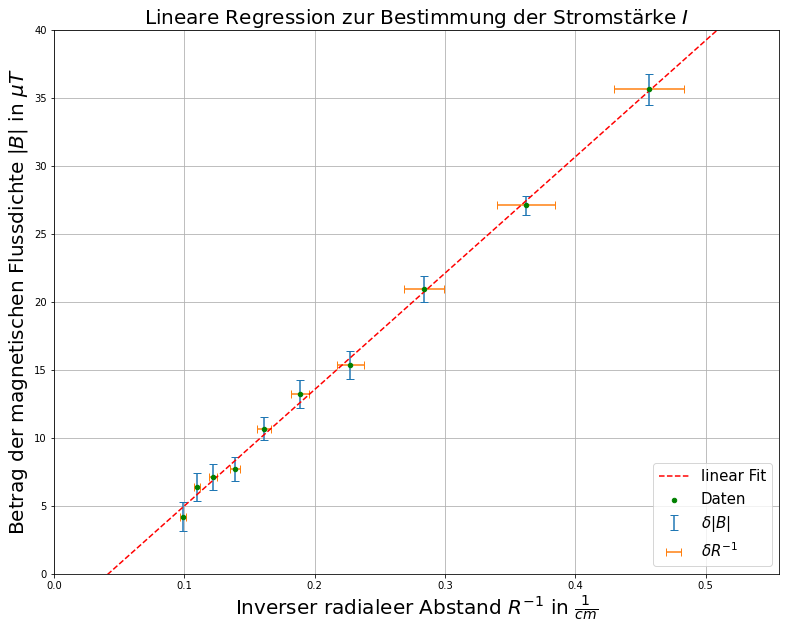

In [141]:
r1 = ufloat(2.19,0.13) #r = radialer Abstand
r2 = ufloat(2.76,0.17)
r3 = ufloat(3.52,0.19)
r4 = ufloat(4.4,0.2)
r5 = ufloat(5.3,0.2)
r6 = ufloat(6.2,0.2)
r7 = ufloat(7.2,0.2)
r8 = ufloat(8.2,0.2)
r9 = ufloat(9.1,0.2)
r10 = ufloat(10.1,0.2)

r = np.array([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10])

ri = np.array([])
for i in range(len(r)):
  x = 1/r[i]
  ri = np.append(ri, x)

B = np.array([])
for i in range(len(b)):
  x = b[i].nominal_value
  B = np.append(B, x)

Ri = np.array([])
for i in range(len(ri)):
  x = ri[i].nominal_value
  Ri = np.append(Ri, x)

Error_B = np.array([])
for i in range(len(b)):
  x = b[i].std_dev
  Error_B = np.append(Error_B, x) 

Error_Ri = np.array([])
for i in range(len(ri)):
  x = ri[i].std_dev
  Error_Ri = np.append(Error_Ri, x)  

def linF(x, a,b):
    return a*x + b 
  
fig, axs = plt.subplots(1,1,figsize=(13, 10));
plt.scatter(Ri, B, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(Ri,B,yerr = Error_B,linestyle='none',capsize = 4, label = r'$δ|B|$');
axs.errorbar(Ri,B,xerr = Error_Ri,linestyle='none',capsize = 4, label = r'$δR^{-1}$');
sc.optimize.curve_fit(linF, Ri, B, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, Ri, B)
a, b = popt
#print('Geradengleichung:')
#print('y = %.5f * x + %.5f \n' % (a, b))

x_line = arange(0, max(B), 1)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

#print('a =', a1)
#print('b =', b1)

mu0 = 1.257*10**(-6)
I = 2*math.pi*a1/(mu0*10**(8))
#print('I = ', I)
print('\n')




axs.set_xlabel(r'Inverser radialer Abstand $R^{-1}$ in $\frac{1}{cm}$', fontsize = 20);
axs.set_ylabel(r'Betrag der magnetischen Flussdichte $|B|$ in $\mu T$', fontsize = 20);

axs.legend(loc = 'lower right',fontsize=15)

plt.axis([0, max(Ri)+0.1, 0, 40])
plt.title(r'Lineare Regression zur Bestimmung der Stromstärke $I$', fontsize = 20)
plt.grid()

plt.show()

Abbildung 1: Die experimentellen Werte für den Betrag der magnetischen Flussidchte $|B|$ werden gegen den Inversen radialen Abstand $R^{-1}$ geplotet und ein linearer Fit angelegt um die Steigung $a$ zu bestimmen.


Der lineare Fit lässt ich durch $y(x)$ beschreiben mit:

$y(x) = (85,6±2,2)cm\cdot\mu T * x - (3,58±0,13)\mu T$

Dabei ist für uns hier nur die Steigung $a$ relevant, da sich aus ihr die Stromsärke $I$ berechnen lässt:

$a = (85,6±2,2)cm\cdot\mu T $

$a = \frac{\mu_0 I}{2\pi}$

$I = \frac{2\pi a}{\mu_0} = (4,28±0,11) A$

Es sollte außerdem noch ein Schätzwert für die Stromstärke $I_{approx}$ aus der Länge des Drahts und den Widerstanden der Batterie und des Drahts berechnet werden:

$L_D = (1,80±0,02)m$

$R_B = 0,15 Ω$

$r_D = 40,1 \frac{Ω}{km}$

$I_{approx} = \frac{U}{R_B + r_D\cdot L_D} = (6,75±0,02) A$

Obwohl die experimentellen Werte eigentlich sehr schön auf dem linearen Fit liegen, was auf eine saubere experimentelle Versuchsdurchführung schließen lässt ist der Schätzwert $I_{approx}$ ca 1,5 mal größer als die berechnete Stromstärke aus dem linearen Fit. Trotzdem lässt sich durch die hohe Genauigkeit der Punkte auf dem linearen Fit auf einen systematischen Fehler schließen, was auf eine externe magnetische Störquelle oder einen kalibrierungs Fehler des iOLab-Geräts schließen lässt.

In [145]:
L = ufloat(1.8,0.02)
ia = 1.5/(0.15 + 0.0401 * L)
#print(ia)